<a href="https://colab.research.google.com/github/Klevertak/SensorPrediction/blob/dev/SensorPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import os

Load data

In [6]:
DATA_PATH="/content/drive/MyDrive/Data/Dataset1"

In [7]:
X_train = np.load(os.path.join(DATA_PATH, 'X_train.npy'))

In [8]:
X_train[0,:,1]

array([-0.1232167, -0.1268756, -0.1240037, -0.1249279, -0.1257667,
       -0.124462 , -0.1273606, -0.1278912, -0.1258682, -0.1243682,
       -0.1231382, -0.1213345, -0.1183578, -0.120062 , -0.1221186,
       -0.12008  , -0.1209017, -0.1213949, -0.1215677, -0.1246812,
       -0.1254896, -0.1249345, -0.1249063, -0.1249926, -0.1251552,
       -0.1247985, -0.1254793, -0.1268068, -0.1272888, -0.123713 ,
       -0.1192631, -0.1226967, -0.1271224, -0.126278 , -0.1261419,
       -0.1251686, -0.121594 , -0.1190558, -0.1179128, -0.1174034,
       -0.1172102, -0.1181487, -0.1185709, -0.1179084, -0.1205067,
       -0.1243031, -0.1256299, -0.1246896, -0.1218014, -0.1202801,
       -0.1206562, -0.1210648, -0.1216185, -0.1241114, -0.1280997,
       -0.1280257, -0.126537 , -0.1274474, -0.1273523, -0.1264597,
       -0.1247455, -0.1236691, -0.1229069, -0.1215528, -0.123976 ,
       -0.1268078, -0.1277862, -0.1266547, -0.1236336, -0.1249187,
       -0.1243005, -0.1197982, -0.1192223, -0.120174 , -0.1213

In [9]:
y_train =  np.load(os.path.join(DATA_PATH, 'y_train.npy'))

In [10]:
y_train.shape

(7352, 6)

In [11]:
X_test = np.load(os.path.join(DATA_PATH, 'X_test.npy'))

In [12]:
X_test.shape

(2947, 128, 9)

In [13]:
y_test = np.load(os.path.join(DATA_PATH, 'y_test.npy'))

In [14]:
y_test.shape

(2947, 6)

Analysis

In [15]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [16]:
from scipy import signal

In [17]:
import matplotlib
from matplotlib import pyplot as plt

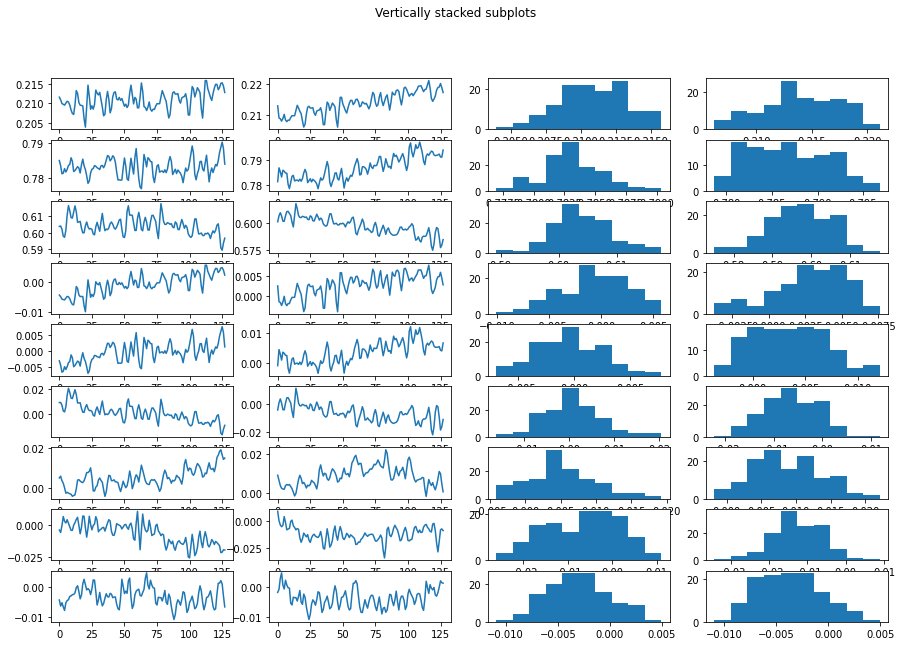

In [18]:
sens_count = 9

plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(sens_count,4)
fig.suptitle('Vertically stacked subplots')

for i in range(0,sens_count):
  axs[i,0].plot(X_train[3501,:,i])
  axs[i,1].plot(X_train[3502,:,i])
  axs[i,2].hist(X_train[3501,:,i])
  axs[i,3].hist(X_train[3502,:,i])  

In [19]:
class_counts_train = np.sum(y_train, axis=0)
class_counts_test = np.sum(y_test, axis=0)

<BarContainer object of 6 artists>

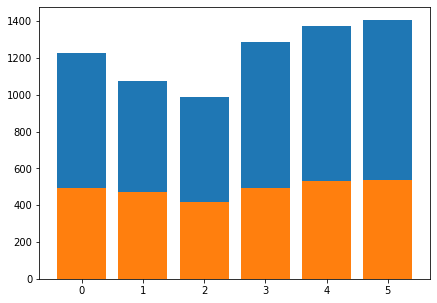

In [20]:
plt.rcParams["figure.figsize"] = (7,5)
plt.bar(range(0,6),height=class_counts_train)
plt.bar(range(0,6),height=class_counts_test)

In [21]:
f, t, Zxx = signal.stft(X_train[3501,:,0], fs=16, nperseg=16)

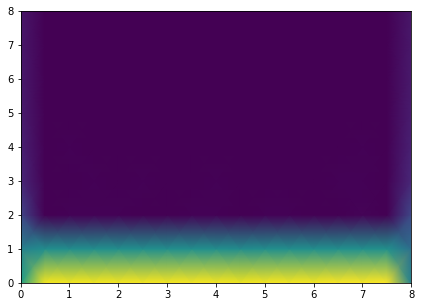

In [22]:
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')

In [23]:
X_train.shape

(7352, 128, 9)

In [24]:
arrays = [
    [s for s in range(9) for v in range(128)],
    [v  for s in range(9) for v in range(128)],
]

In [25]:
tuples = list(zip(*arrays))

In [26]:
index = pd.MultiIndex.from_tuples(tuples, names=["sensor", "val"])

In [27]:
index

MultiIndex([(0,   0),
            (0,   1),
            (0,   2),
            (0,   3),
            (0,   4),
            (0,   5),
            (0,   6),
            (0,   7),
            (0,   8),
            (0,   9),
            ...
            (8, 118),
            (8, 119),
            (8, 120),
            (8, 121),
            (8, 122),
            (8, 123),
            (8, 124),
            (8, 125),
            (8, 126),
            (8, 127)],
           names=['sensor', 'val'], length=1152)

In [28]:
np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])).shape

(7352, 1152)

In [29]:
df_train = pd.DataFrame(np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])), columns=index)

In [30]:
df_train

sensor         0                      ...         8                    
val          0         1         2    ...       125       126       127
0       1.012817  1.022833  1.022028  ... -0.002170 -0.005643 -0.001446
1       1.018851  1.022380  1.020781  ...  0.005045 -0.004424 -0.002798
2       1.023127  1.021882  1.019178  ... -0.005566 -0.003702 -0.002645
3       1.017682  1.018149  1.019854  ... -0.008408 -0.011158 -0.012987
4       1.019952  1.019616  1.020933  ... -0.004491 -0.003441 -0.010082
...          ...       ...       ...  ...       ...       ...       ...
7347    1.374753  1.604501  1.759656  ...  0.105364  0.192774  0.251018
7348    1.713028  1.709944  1.321608  ...  0.319005  0.231496  0.234651
7349    0.754892  0.804314  0.831714  ...  0.254344  0.281431  0.254206
7350    0.927927  0.912987  0.924660  ...  0.176212  0.163561  0.188734
7351    0.798091  0.819242  0.865882  ... -0.362512 -0.383989 -0.335884

[7352 rows x 1152 columns]

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 1152 entries, (0, 0) to (8, 127)
dtypes: float64(1152)
memory usage: 64.6 MB


In [32]:
df_train.to_numpy().shape

(7352, 1152)

In [33]:
df_train['target'] =  np.argmax(y_train, axis=1)

In [34]:
df_train.iloc[7000][8]

val
0     -0.008275
1     -0.011662
2     -0.017568
3     -0.027395
4     -0.036707
         ...   
123    0.074807
124    0.137798
125    0.225708
126    0.264001
127    0.250841
Name: 7000, Length: 128, dtype: float64

In [35]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_train.drop(['target'],axis=1).to_numpy())

In [36]:
# df_train.drop(['target'],axis=1).to_numpy()

In [37]:
pca_result.shape

(7352, 3)

No handles with labels found to put in legend.


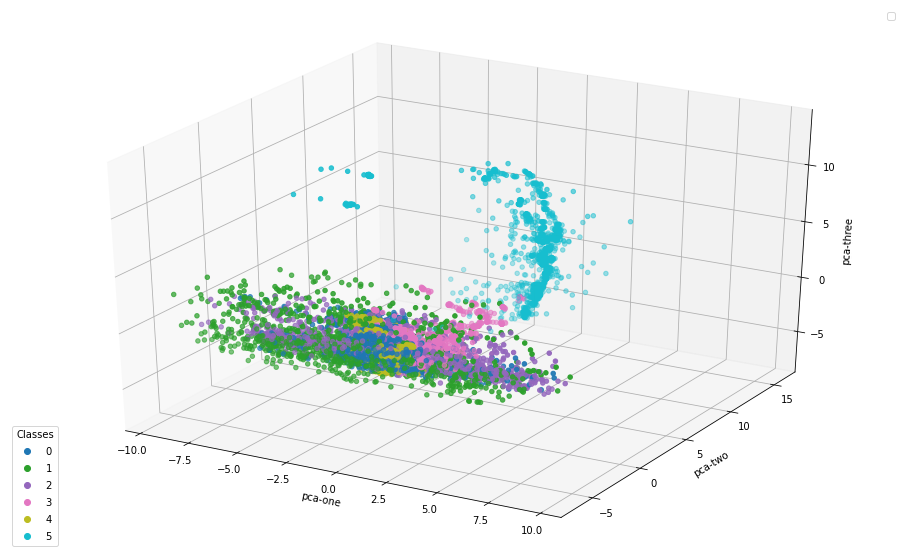

In [38]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
          xs=pca_result[:,2], 
          ys=pca_result[:,0], 
          zs=pca_result[:,1], 
          c=df_train['target'], 
          cmap='tab10'          
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.legend()
plt.show()

In [39]:
import plotly.express as px

fig = px.scatter_3d(pca_result, x=0, y=1, z=2,
              color=df_train['target'])
fig.show()

In [40]:
## Standardizing the data
X_train_scaled = StandardScaler().fit_transform(np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))

In [41]:
pca1 = PCA(n_components=3)
pca_result1 = pca.fit_transform(X_train_scaled)

In [42]:
fig = px.scatter_3d(pca_result1, x=1, y=0, z=2,
              color=df_train['target'])
fig.show()

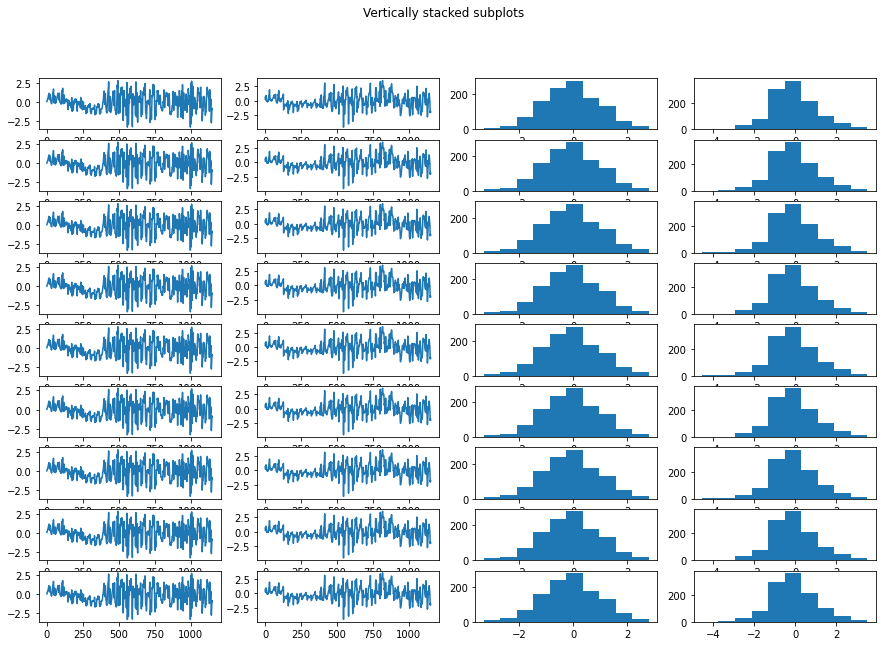

In [43]:
sens_count = 9

plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(sens_count,4)
fig.suptitle('Vertically stacked subplots')

for i in range(0,sens_count):
  axs[i,0].plot(X_train_scaled[3350,:])
  axs[i,1].plot(X_train_scaled[3529,:])
  axs[i,2].hist(X_train_scaled[3350,:])
  axs[i,3].hist(X_train_scaled[3529,:]) 

## SVM model

In [71]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [113]:
from sklearn.preprocessing import label_binarize

In [51]:
X=np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))

In [52]:
y = np.argmax(y_train, axis=1)

In [53]:
data_train, data_val, target_train, target_val = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [54]:
data_train.shape

(5881, 1152)

In [126]:
def calculate_metrics(target, pred, labels=[0,1,2,3,4,5]):
  ps = precision_score(target, pred, average='weighted')  
  rs = recall_score(target, pred, average='weighted')
  target_bin = label_binarize(target, classes=labels)
  pred_bin = label_binarize(pred, classes=labels)
  raus = roc_auc_score(target_bin, pred_bin, multi_class='ovo')
  return 'Precision: '+"%.2f \n" % (ps*100)+ \
          'Recall: '+"%.2f \n" % (rs*100) + \
          'Roc Auc: '+"%.2f \n" % (raus*100) 

### Polynomial kernel

In [79]:
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(data_train, target_train)

In [80]:
poly_pred = poly.predict(data_val)

In [127]:
# poly_accuracy = accuracy_score(target_val, poly_pred)
# poly_f1 = f1_score(target_val, poly_pred, average='weighted')
# print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
# print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
calculate_metrics(target_val.ravel(), poly_pred.ravel())

'Precision: 92.37 \nRecall: 91.98 \nRoc Auc: 95.17 \n'

### RBF kernel

In [68]:
rbf = svm.SVC(kernel='rbf', gamma=0.01, C=100).fit(data_train, target_train)

In [69]:
rbf_pred = rbf.predict(data_val)

In [128]:
# rbf_accuracy = accuracy_score(target_val, rbf_pred)
# rbf_f1 = f1_score(target_val, rbf_pred, average='weighted')
# print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
# print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
calculate_metrics(target_val.ravel(), rbf_pred.ravel())

'Precision: 94.26 \nRecall: 94.15 \nRoc Auc: 96.56 \n'